In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv(r'Walmart.csv')

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [ ]:
df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

<ipython-input-6-182e23b44254>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Date']=pd.to_datetime(df['Date'])


In [ ]:
df['Month']=pd.DatetimeIndex(df['Date']).month
df['Year']=pd.DatetimeIndex(df['Date']).year
df['Day']=pd.DatetimeIndex(df['Date']).day
df['Week']=pd.DatetimeIndex(df['Date']).week

<ipython-input-7-82ffa8c3cc75>:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  df['Week']=pd.DatetimeIndex(df['Date']).week


In [8]:
df.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [9]:
df.duplicated().sum()

0

In [10]:
Q1=df['Weekly_Sales'].quantile(0.25)
Q3=df['Weekly_Sales'].quantile(0.75)
IQR=Q3-Q1
df=df[(df['Weekly_Sales']>=Q1-1.5*IQR) &(df['Weekly_Sales']<=Q3+1.5*IQR)]


In [11]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6401.000000,6.401000e+03,6401.000000,6401.000000,6401.000000,6401.000000,6401.000000
mean,23.054210,1.036130e+06,0.068895,60.772042,3.359634,171.642219,8.002298
std,12.991284,5.451961e+05,0.253296,18.417068,0.459696,39.359852,1.878705
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.517431e+05,0.000000,47.660000,2.933000,131.784000,6.891000
50%,23.000000,9.572983e+05,0.000000,62.860000,3.452000,182.658578,7.874000
75%,34.000000,1.414565e+06,0.000000,75.000000,3.737000,212.833640,8.622000
max,45.000000,2.685352e+06,1.000000,100.140000,4.468000,227.232807,14.313000


<Axes: xlabel='Store'>

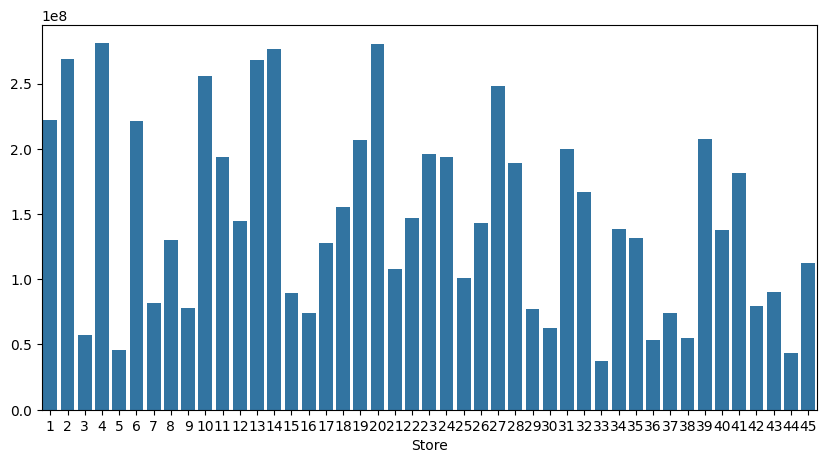

In [ ]:
a=df.groupby(['Store',])['Weekly_Sales'].sum()
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(y=a.values,x=a.index)

In [ ]:
a=pd.DataFrame(a)

### **Store with maxium Sales**

In [ ]:
max_sales_store=a.sort_values('Weekly_Sales',ascending=False)[0:1].reset_index()
max_sales_store

,Store,Weekly_Sales
0,4,2.810352e+08


### **top 5 best performing stores**

In [ ]:
best_sales_store=a.sort_values('Weekly_Sales',ascending=False)[0:5].reset_index()
best_sales_store

,Store,Weekly_Sales
0,4,2.810352e+08
1,20,2.800237e+08
2,14,2.761276e+08
3,2,2.687221e+08
4,13,2.682025e+08


### **Store with minimum Sales**

In [ ]:
min_sales_store=a.sort_values('Weekly_Sales',ascending=True)[0:1].reset_index()
min_sales_store

,Store,Weekly_Sales
0,33,37160221.96


### **top  5 least performing Stores**

In [ ]:
worst_sales_store=a.sort_values('Weekly_Sales',ascending=True)[0:5].reset_index()
worst_sales_store

,Store,Weekly_Sales
0,33,37160221.96
1,44,43293087.84
2,5,45475688.90
3,36,53412214.97
4,38,55159626.42


**Conclusion :**

store number 20 had maxium sales

while store number 33 had a minimum sales

### **difference between maxium sales and minimum sales**

In [ ]:
difference=max_sales_store['Weekly_Sales']-min_sales_store['Weekly_Sales']
difference

0    2.438750e+08
Name: Weekly_Sales, dtype: float64

### **TOP 5 days  when sales was maxium**

In [ ]:
df.groupby(['Date'])['Weekly_Sales'].sum().sort_values(ascending=False).reset_index().head(5)


,Date,Weekly_Sales
0,2011-09-12,55561147.70
1,2011-11-25,54868300.43
2,2012-06-04,53502315.87
3,2011-12-23,53389269.84
4,2010-10-12,52914648.31


Text(0.5, 1.0, 'Store vs Unemployment')

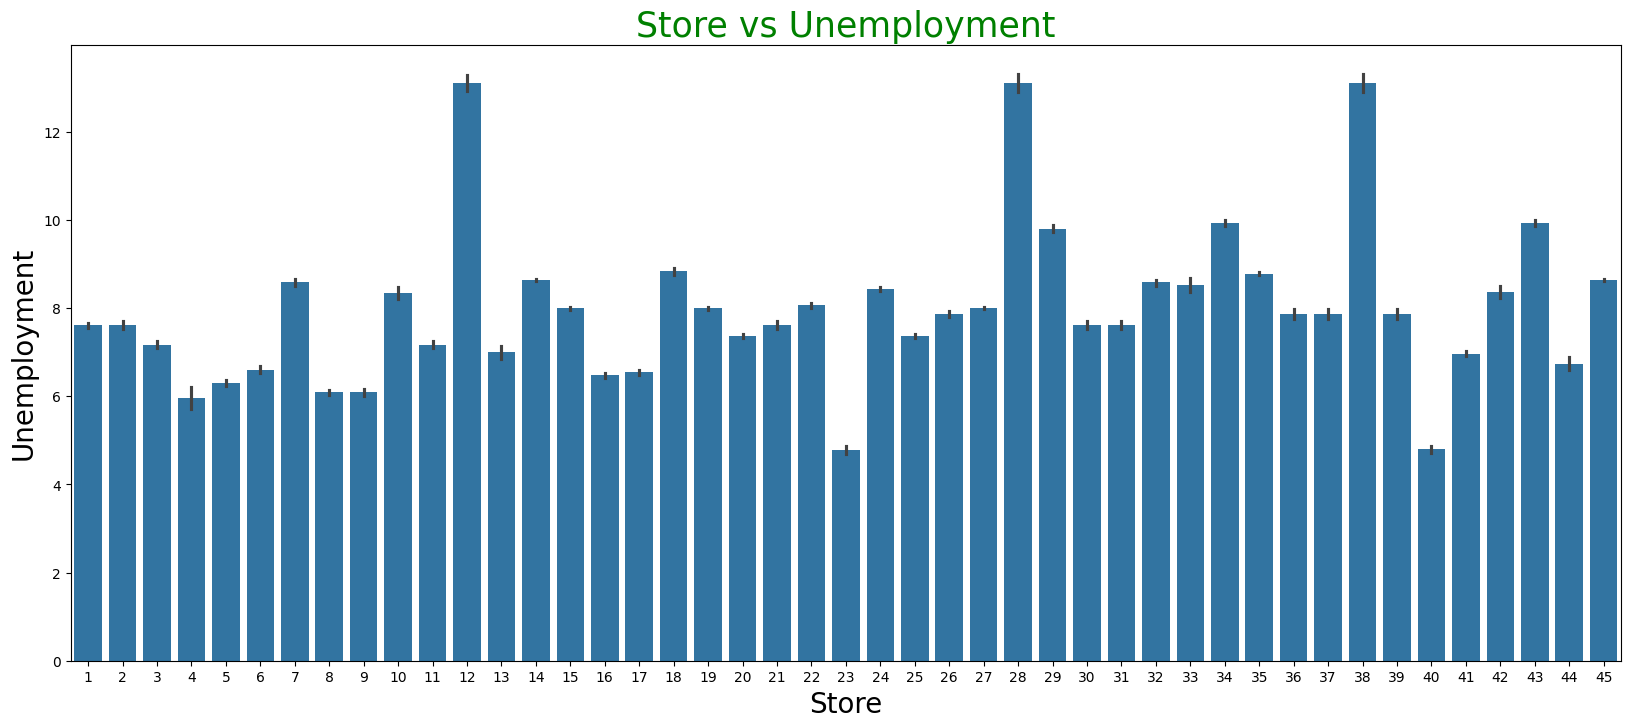

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x=df['Store'],y=df['Unemployment'])
plt.xlabel('Store',fontsize=20)
plt.ylabel('Unemployment',fontsize=20)
plt.title('Store vs Unemployment',fontsize=25,color='g')

Text(0.5, 1.0, 'Year vs Unemployment')

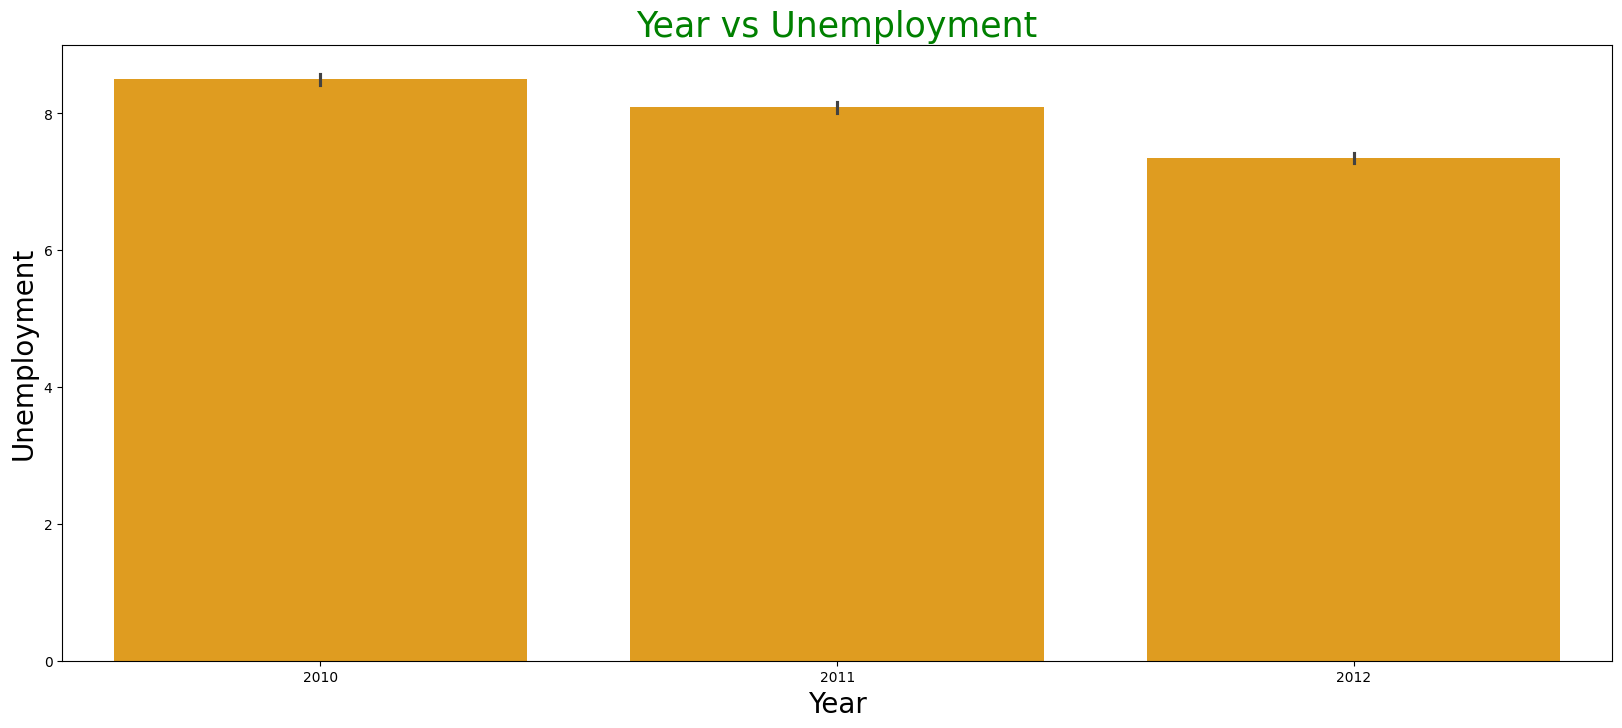

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x=df['Year'],y=df['Unemployment'],color='orange')
plt.xlabel('Year',fontsize=20)
plt.ylabel('Unemployment',fontsize=20)
plt.title('Year vs Unemployment',fontsize=25,color='g')

In [ ]:
df['Weekly_Sales'].corr(df['Unemployment'])

-0.10429750912578388

In [ ]:
correlations = df.groupby('Store')['Weekly_Sales', 'Unemployment'].corr().unstack()

<ipython-input-24-8e797e30c704>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  correlations = df.groupby('Store')['Weekly_Sales', 'Unemployment'].corr().unstack()


In [ ]:
correlations['Unemployment']['Weekly_Sales'].sort_values(ascending=True)

Store
38   -0.785290
44   -0.780076
4    -0.639563
13   -0.400254
39   -0.384681
42   -0.356355
41   -0.350630
17   -0.263600
3    -0.230413
37   -0.221287
5    -0.207043
43   -0.201954
9    -0.191534
7    -0.165382
23   -0.125490
40   -0.112528
20   -0.109391
32   -0.099455
1    -0.097955
16   -0.070864
26   -0.066899
31   -0.064738
8    -0.052580
11   -0.020339
24   -0.012261
12   -0.009286
25   -0.004958
45   -0.004041
27   -0.002535
6     0.016833
34    0.017010
22    0.039043
2     0.054288
15    0.078905
29    0.084682
33    0.101175
19    0.101464
28    0.136671
18    0.139179
10    0.186979
30    0.201862
21    0.218367
14    0.269510
35    0.483865
36    0.833734
Name: Weekly_Sales, dtype: float64

**Conclusion :** store 38,44,4 etc has more affected due to unemployement

In [ ]:
cor=df.groupby(['Store'])['Weekly_Sales',"CPI"].corr().unstack()
cor['Weekly_Sales']['CPI'].sort_values(ascending=True)

<ipython-input-27-1b2671f28e3a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  cor=df.groupby(['Store'])['Weekly_Sales',"CPI"].corr().unstack()


Store
36   -0.915095
14   -0.498495
35   -0.424107
30   -0.298188
43   -0.285686
27   -0.235769
18   -0.193541
15   -0.174467
21   -0.163649
19   -0.155341
10   -0.130205
28   -0.095908
29   -0.072530
2    -0.063786
33   -0.052271
22   -0.038602
45   -0.023548
24   -0.013684
25   -0.010914
6     0.033524
11    0.069781
12    0.084087
40    0.113318
34    0.115437
8     0.120255
16    0.124285
26    0.131980
31    0.132887
23    0.137196
32    0.196782
20    0.203508
1     0.225408
37    0.244507
7     0.289044
9     0.294805
5     0.308261
3     0.317250
17    0.348571
42    0.360859
41    0.392293
13    0.401445
39    0.428043
4     0.675231
44    0.740150
38    0.812837
Name: CPI, dtype: float64

**Conclusion :** store 36,14,35 etc has more affected due to CPI

<Axes: xlabel='Temperature', ylabel='Weekly_Sales'>

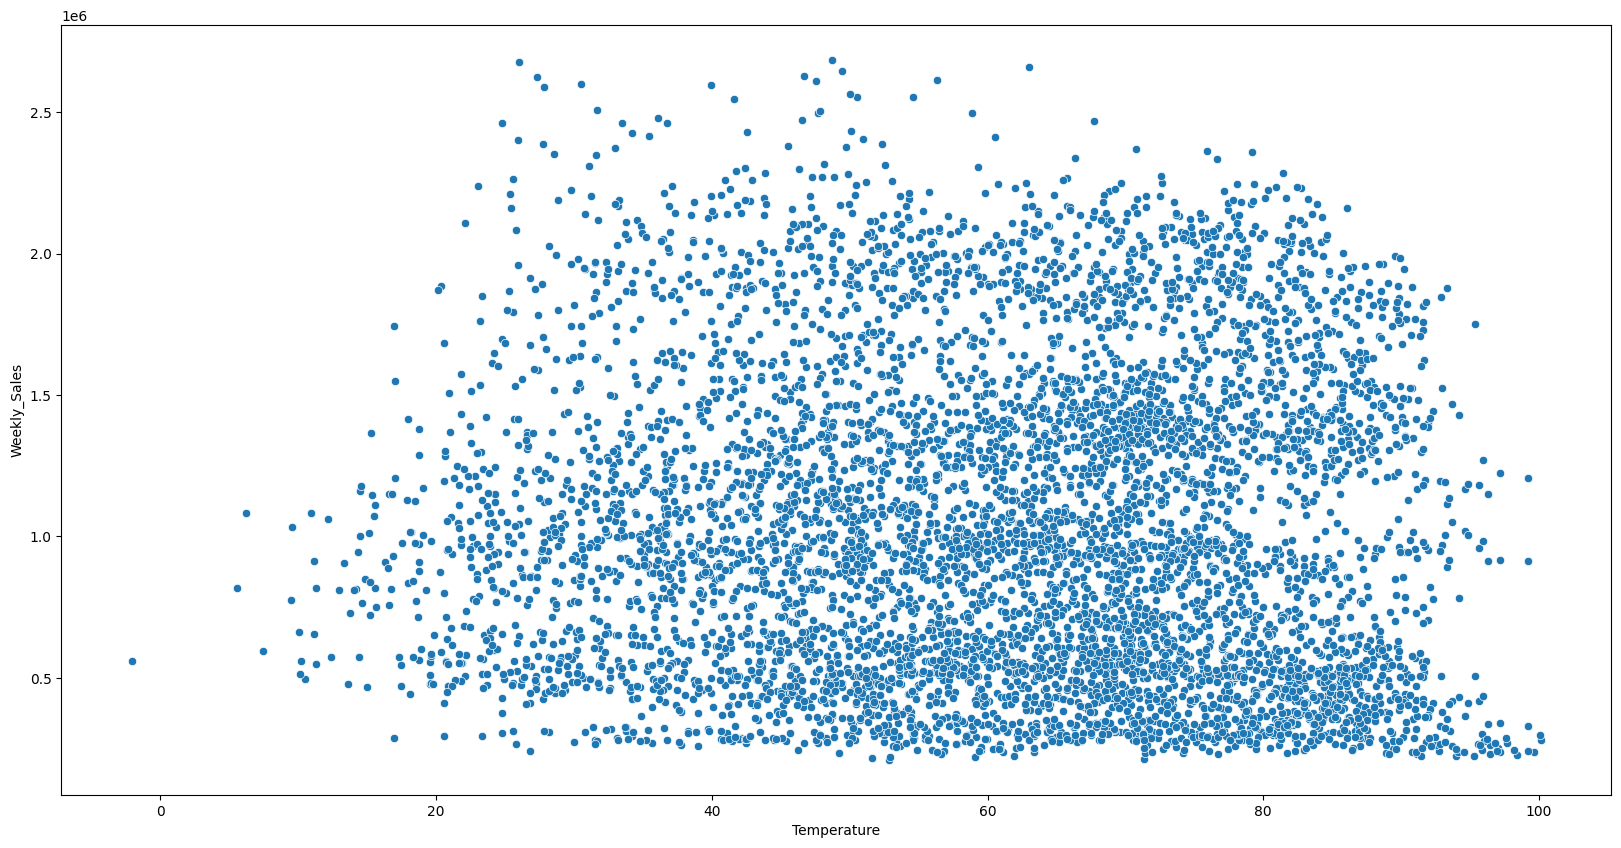

In [ ]:
plt.figure(figsize=(20,10))
sns.scatterplot(x=df['Temperature'],y=df['Weekly_Sales'])

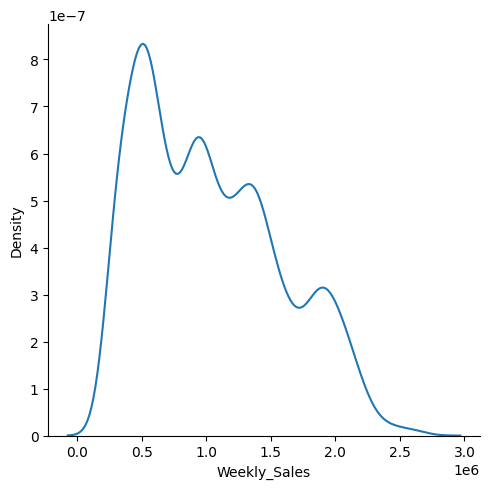

In [ ]:
sns.displot(df['Weekly_Sales'],kind='kde')

<ipython-input-31-943ac5886fc5>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='Month', y='Weekly_Sales', hue='Year', data=df,marker='o',ci=None,


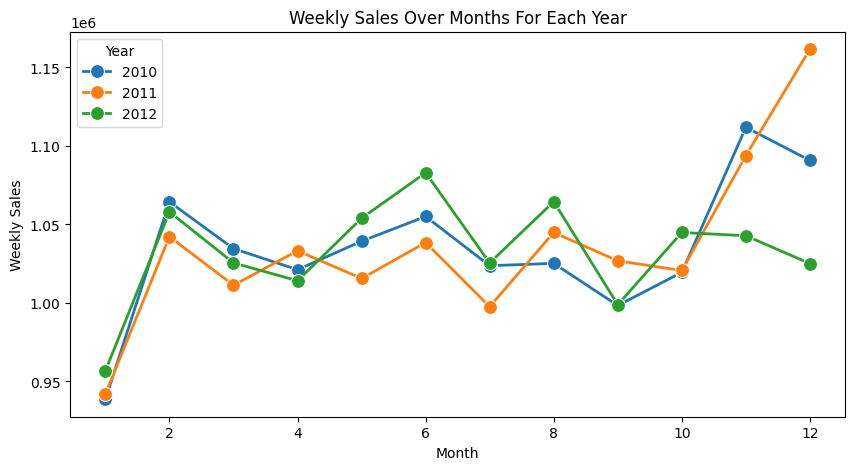

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Month', y='Weekly_Sales', hue='Year', data=df,marker='o',ci=None,
             palette=["#1f77b4", "#ff7f0e", "#2ca02c"],markersize=10,linewidth=2)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Weekly Sales')
plt.title('Weekly Sales Over Months For Each Year')

# Show the plot
plt.show()

In [ ]:
df.columns

Index(['Store', 'Date', 'Weekly_Sales', 'Holiday_Flag', 'Temperature',
       'Fuel_Price', 'CPI', 'Unemployment', 'Month', 'Year', 'Day', 'Week'],
      dtype='object')

<ipython-input-33-59746094c99e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap='coolwarm')


<Axes: >

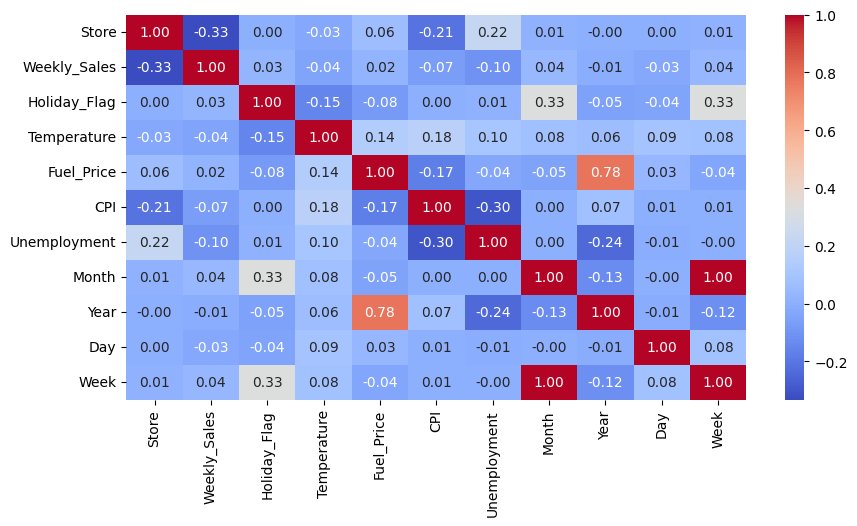

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap='coolwarm')

<ipython-input-34-034666d10433>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df['Year'],y=df['Fuel_Price'],ci=None)


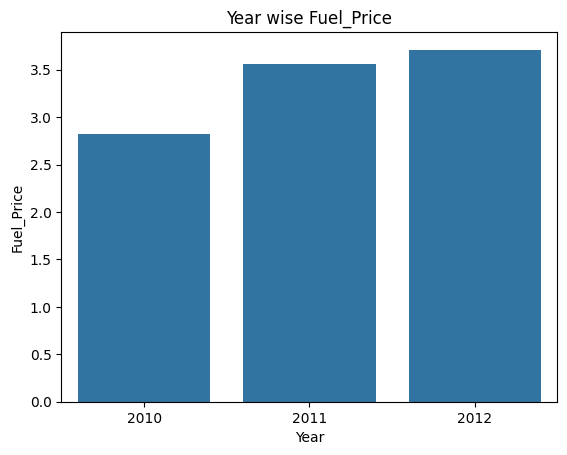

In [ ]:
sns.barplot(x=df['Year'],y=df['Fuel_Price'],ci=None)
plt.title('Year wise Fuel_Price')
plt.show()

In [ ]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Month,Year,Day,Week
0,1,2010-05-02,1643690.90,0,42.31,2.572,211.096358,8.106,5,2010,2,17
1,1,2010-12-02,1641957.44,1,38.51,2.548,211.242170,8.106,12,2010,2,48
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010,19,7
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010,26,8
4,1,2010-05-03,1554806.68,0,46.50,2.625,211.350143,8.106,5,2010,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684,9,2012,28,39
6431,45,2012-05-10,733455.07,0,64.89,3.985,192.170412,8.667,5,2012,10,19
6432,45,2012-12-10,734464.36,0,54.47,4.000,192.327265,8.667,12,2012,10,50
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667,10,2012,19,42


### **MODEL selection and forcasting**

In [ ]:
df=pd.read_csv(r'Walmart DataSet.csv')

In [ ]:
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


### **let us forcast for store  for next 12 weeks**

In [ ]:
store=int(input('Enter the store no for which to want forcast sales'))

Enter the store no for which to want forcast sales1


In [ ]:
sf=df[df.Store==store].loc[:,['Date','Weekly_Sales']]

Text(0.5, 1.0, 'Weekly distribution sales for store 1')

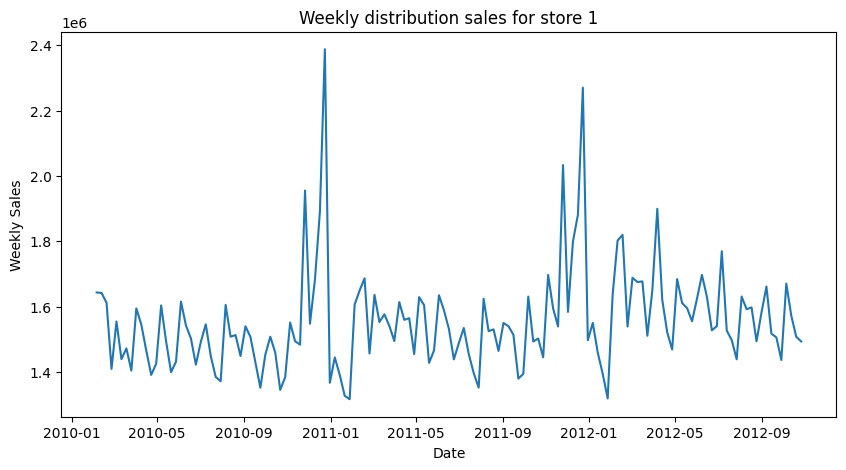

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(sf['Date'],sf['Weekly_Sales'])
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title(f'Weekly distribution sales for store {store}')

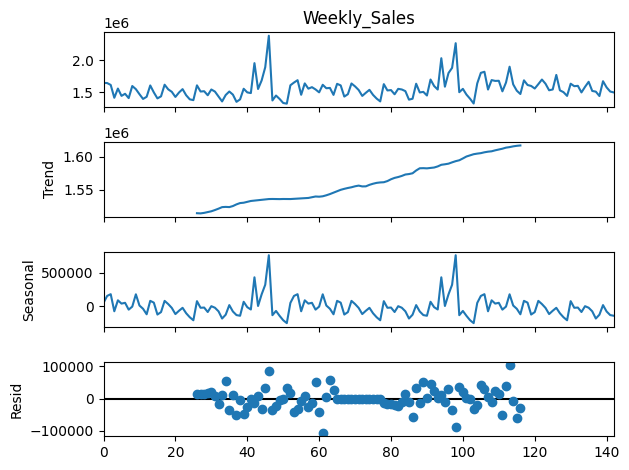

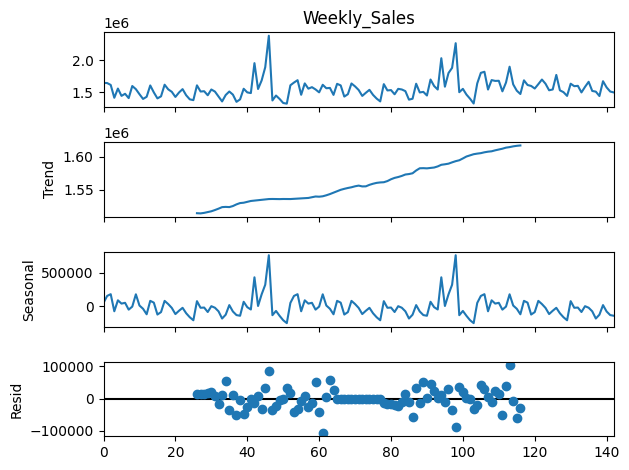

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose=seasonal_decompose(sf['Weekly_Sales'],period=52)
decompose.plot()

In [ ]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller


time_series = sf['Weekly_Sales']

result = adfuller(time_series)


print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


if result[1] <= 0.05:
    print("Reject the null hypothesis; the data is likely stationary.")
else:
    print("Fail to reject the null hypothesis; the data is likely non-stationary.")


ADF Statistic: -5.102186145192288
p-value: 1.3877788330759434e-05
Critical Values: {'1%': -3.47864788917503, '5%': -2.882721765644168, '10%': -2.578065326612056}
Reject the null hypothesis; the data is likely stationary.


<function matplotlib.pyplot.show(close=None, block=None)>

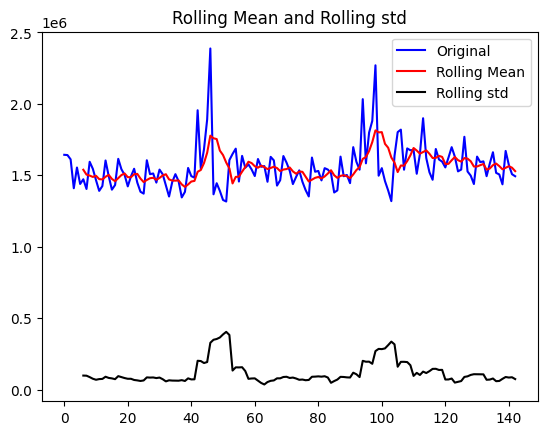

In [ ]:
mean_log = sf['Weekly_Sales'].rolling(window=7).mean()
std_log = sf['Weekly_Sales'].rolling(window=7).std()
plt.plot(sf['Weekly_Sales'], color="blue",label="Original")
plt.plot(mean_log,color="red",label="Rolling Mean")
plt.plot(std_log,color="black",label="Rolling std")
plt.legend(loc="best")
plt.title("Rolling Mean and Rolling std")
plt.show

In [ ]:
train=sf.iloc[:108]
test=sf.iloc[108:]


In [ ]:
# import pmdarima as pm
# model=pm.auto_arima(sf['Weekly_Sales'],start_p=3,start_q=3,test='adf',
#                     max_p=3,max_q=5,m=52,d=None,max_d=1,
#                     seasonal=True,start_P=0,D=0,trace=True,error_action='ignore',
#                     supress_warnings=True,stepwise=False)

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(train['Weekly_Sales'],order=(2,0,2))
model_fit = model.fit()


sf['Predict'] = model_fit.predict(start=len(train),end=len(train)+len(test)-1, dynamic=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


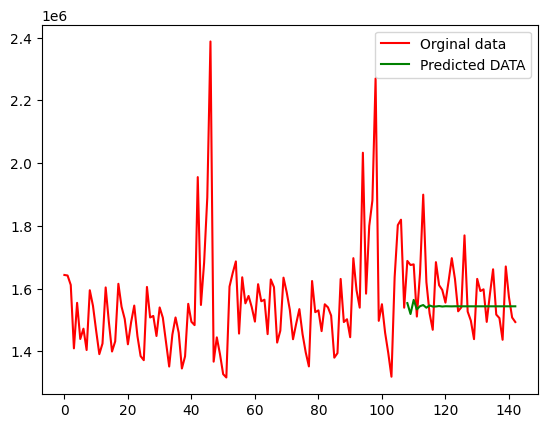

In [ ]:
plt.plot(sf['Weekly_Sales'],color='r',label='Orginal data')
plt.plot(sf['Predict'],color='g',label='Predicted DATA')
plt.legend()

In [ ]:
sf.set_index('Date',inplace=True)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX,SARIMAXResults
model=SARIMAX(train['Weekly_Sales'],order=(2,0,2),seasonal_order=(1,0,0,52))
l1=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


In [ ]:
sf.reset_index(inplace=True)

In [ ]:
sf['pre']=l1.predict(start=len(train),end=len(train)+len(test)-1,dynamic=True)

### **Let's forcast for store  for next 12 weeks**

In [ ]:
from sklearn.metrics import mean_squared_error
rmse2 = mean_squared_error(test['Weekly_Sales'],sf['pre'].iloc[108:], squared=False)
print(f'RMSE for SARIMAX: {rmse2}')

RMSE for SARIMAX: 69038.89635257257


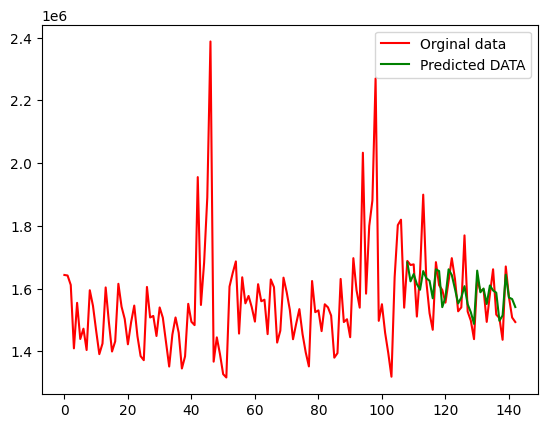

In [ ]:
plt.plot(sf['Weekly_Sales'],color='r',label='Orginal data')
plt.plot(sf['pre'],color='g',label='Predicted DATA')
plt.legend()

In [ ]:
sf.drop(['Predict','pre'],axis=1,inplace=True)


In [ ]:
sf.set_index('Date',inplace=True)

In [ ]:
sf

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81


In [ ]:
# 36 steps of test data and 12 steps of next 12 weeks
forecast = l1.forecast(steps=48)

# Generating future dates
forecast_index = pd.date_range(start=sf.index[107], periods=49, freq='W')[1:]
forecast_index

DatetimeIndex(['2012-03-04', '2012-03-11', '2012-03-18', '2012-03-25',
               '2012-04-01', '2012-04-08', '2012-04-15', '2012-04-22',
               '2012-04-29', '2012-05-06', '2012-05-13', '2012-05-20',
               '2012-05-27', '2012-06-03', '2012-06-10', '2012-06-17',
               '2012-06-24', '2012-07-01', '2012-07-08', '2012-07-15',
               '2012-07-22', '2012-07-29', '2012-08-05', '2012-08-12',
               '2012-08-19', '2012-08-26', '2012-09-02', '2012-09-09',
               '2012-09-16', '2012-09-23', '2012-09-30', '2012-10-07',
               '2012-10-14', '2012-10-21', '2012-10-28', '2012-11-04',
               '2012-11-11', '2012-11-18', '2012-11-25', '2012-12-02',
               '2012-12-09', '2012-12-16', '2012-12-23', '2012-12-30',
               '2013-01-06', '2013-01-13', '2013-01-20', '2013-01-27'],
              dtype='datetime64[ns]', freq='W-SUN')

In [ ]:
forecast=pd.DataFrame(forecast)
forecast['Date']=forecast_index
forecast.set_index('Date',inplace=True)

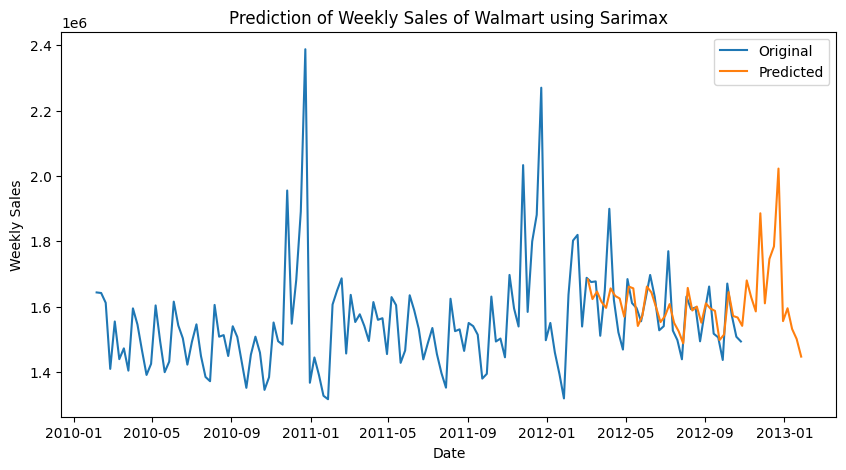

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(sf['Weekly_Sales'],label='Original')
plt.plot(forecast['predicted_mean'],label='Predicted')
plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.title('Prediction of Weekly Sales of Walmart using Sarimax')
plt.show()

In [ ]:
sf.reset_index(inplace=True)

### **forcasting using profet model**

In [ ]:
!pip install prophet

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdrer_5k_/3g5sv841.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdrer_5k_/_50ha_ln.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32781', 'data', 'file=/tmp/tmpdrer_5k_/3g5sv841.json', 'init=/tmp/tmpdrer_5k_/_50ha_ln.json', 'output', 'file=/tmp/tmpdrer_5k_/prophet_modelxnym2wsv/prophet_model-20240209083155.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:31:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:31:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


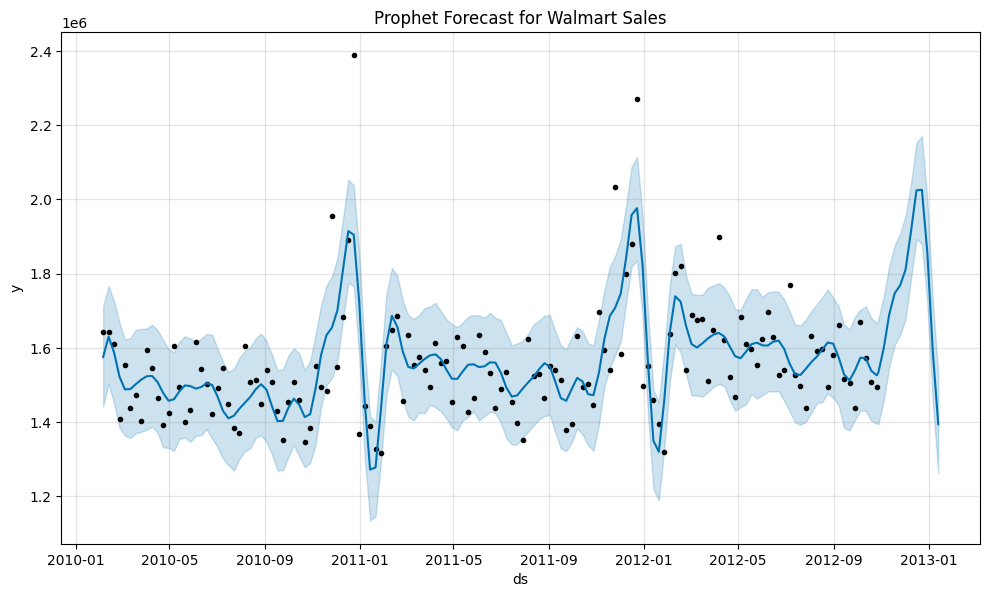

In [ ]:
from prophet import Prophet
sf = sf.rename(columns={'Date': 'ds', 'Weekly_Sales': 'y'})


model = Prophet()
model.fit(sf)

future = model.make_future_dataframe(periods=12,freq='W')
forecast = model.predict(future)


fig = model.plot(forecast)
plt.title('Prophet Forecast for Walmart Sales')
plt.show()


In [ ]:
train=sf.iloc[:108]
test=sf.iloc[108:]



model2 = Prophet()
model2.fit(train)
future = model2.make_future_dataframe(len(test))
forecast = model2.predict(future)


actual_values = test['y'].values
predicted_values = forecast[-len(test):]['yhat'].values

# Calculate RMSE
rmse22 = mean_squared_error(actual_values, predicted_values, squared=False)
print(f"RMSE: {rmse22}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdrer_5k_/mekd9x1c.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpdrer_5k_/aytn092q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86626', 'data', 'file=/tmp/tmpdrer_5k_/mekd9x1c.json', 'init=/tmp/tmpdrer_5k_/aytn092q.json', 'output', 'file=/tmp/tmpdrer_5k_/prophet_modelyuwy5ynu/prophet_model-20240209083156.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:31:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:31:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


RMSE: 98612.66109848322


<Axes: >

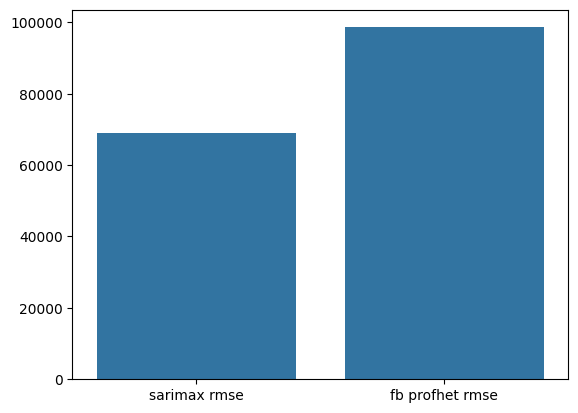

In [ ]:
a=['sarimax rmse','fb profhet rmse']
b=[rmse2,rmse22]
sns.barplot(x=a,y=b)